In [ ]:
import pandas as pd
import re
import numpy as np
import math
from google.colab import output
import matplotlib.pyplot as plt
from imp import reload
reload(plt) 
output.clear()

def seleccion(orig, info, info_orig):
  listafinal = []
  if ',' in orig:
    orig = orig.split(',')
  else:
    orig = [orig]

  for a in orig:
    a = a.strip()
    if info_orig[-1] != 'No especificado' and '(B.D.)' not in info_orig[-1]:
      if ':' in a:
        a = a.split(':')
        for b in [0,1]:
          a[b] = a[b].strip()
        if a[0] not in info_orig: a[0] = info_orig[0]
        if a[1] not in info_orig: a[1] = info_orig[-1]
        if info[a[0]]>info[a[1]]:
          a[0], a[1] = a[1], a[0]
        rango = range(info[a[0]], info[a[1]]+1)
        for c in rango:
          if c not in listafinal:
            listafinal.append(c)
      else:
        if a not in info_orig: a = info_orig[0]
        if info[a] not in listafinal:
          listafinal.append(info[a])
    elif '(B.D.)' in info_orig[-1]:
      a = a.strip().strip('(').strip(')').strip('.')
      for b in range(0,len(info)):
        if f'({a}.)' in info_orig[b] and info[info_orig[b]] not in listafinal:
          listafinal.append(info[info_orig[b]])
    else:
      if ' a ' in a:
        a = a.split(' a ')
        for b in range(0, len(a)):
          a[b] = a[b].strip('años').strip()
          if 'y m' in a[b] or 'm' in a[b]: a[b] = 100
          elif 'espec' in a[b]: a[b] = 105
          elif 'otal' in a[b]: a[b] = -5
          try:
            a[b] = math.floor(int(a[b])/5) + 1
          except:
            a[b] = 0
          if 0 > a[b] or 22 < a[b]: a[b] = 0
          
        a.sort()
        rango = range(a[0], a[-1] + 1)
        for c in rango:
          if c not in listafinal:
            listafinal.append(c)
            
      else:
        try:
          a = math.floor(int(a)/5 + 1)
          if -5 > int(a) or 105 < int(a): a = -5
          if a not in listafinal:
            listafinal.append(a)
        except:
          if 'otal' in a and 0 not in listafinal:
            listafinal.append(0)
          elif 'y m' in a and 21 not in listafinal:
            listafinal.append(21)
          elif 'espec' in a and 22 not in listafinal:
            listafinal.append(22)
          elif 0 not in listafinal:
            listafinal.append(0)

  listafinal.sort()
  if listafinal == []:
    listafinal.append(0)
  if '(B.D.)' not in info_orig[-1]:
    for a in range(0, len(listafinal)):
      listafinal[a] = info_orig[listafinal[a]]
  else:
    for a in range(0, len(listafinal)):
      listafinal.append(info_orig[listafinal[a]])


  return listafinal


def mostrargrafico(listafechas, listaentidades, indic_masc, nombre, nombrey):
    colores = ['green', 'blue', 'red', 'brown', 'purple', 'black']
    y = int(len(indic_masc)/len(listafechas)) 
    plt.figure(figsize = (y/3, 7.0))
    for x in range(0, len(listafechas)):
      m = listafechas[x]
      rd = colores[x]
      datos = indic_masc[x*y: y+ x*y]
      plt.plot(listaentidades,  datos, marker = '_', markersize = 8 , c = rd, label = m)
      #output.clear()
    
    plt.legend(bbox_to_anchor=(1.05, 1),loc= 'upper right')
    plt.xlabel('Estado', fontsize = 10)
    plt.xticks(rotation= 90)
    plt.ylabel(nombrey , fontsize = 10) 
    plt.title(f'{nombre} por estado', fontsize = 20)
    plt.show()
    return
   
  
fechas =            {'1990': 0, '1995': 1, '2000': 2, '2005': 3, '2010': 4, '2020': 5}
fechas_originales = ['1990', '1995', '2000', '2005', '2010', '2020']

entidades = {'Estados Unidos Mexicanos': 0, 'Aguascalientes': 1, 'Baja California': 2, 'Baja California Sur': 3, 'Campeche': 4, 'Coahuila De Zaragoza': 5, 'Colima': 6, \
             'Chiapas': 7, 'Chihuahua': 8, 'Ciudad De México': 9, 'Durango': 10, 'Guanajuato': 11, 'Guerrero': 12, 'Hidalgo': 13, 'Jalisco': 14, 'México': 15, 'Michoacán De Ocampo': 16,\
             'Morelos': 17, 'Nayarit': 18, 'Nuevo León': 19, 'Oaxaca': 20, 'Puebla': 21, 'Querétaro': 22, 'Quintana Roo': 23, 'San Luis Potosí': 24, 'Sinaloa': 25, 'Sonora': 26,\
             'Tabasco': 27, 'Tamaulipas': 28, 'Tlaxcala': 29, 'Veracruz De Ignacio De La Llave': 30, 'Yucatán': 31, 'Zacatecas': 32}
entidades_originales = ['Estados Unidos Mexicanos', 'Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza', 'Colima', \
             'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',\
             'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', \
             'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']

edades  =            {'Total': 0, '0 a 4 años': 1, '5 a 9 años': 2, '10 a 14 años': 3, '15 a 19 años': 4, '20 a 24 años': 5, '25 a 29 años': 6, '30 a 34 años': 7,\
                      '35 a 39 años': 8, '40 a 44 años': 9, '45 a 49 años': 10, '50 a 54 años': 11, '55 a 59 años': 12, '60 a 64 años': 13, '65 a 69 años': 14,\
                      '70 a 74 años': 15, '75 a 79 años': 16, '80 a 84 años': 17, '85 a 89 años': 18, '90 a 94 años': 19, '95 a 99 años': 20, '100 años y más': 21, 'No especificado': 22}
edades_originales =  ['Total', '0 a 4 años', '5 a 9 años', '10 a 14 años', '15 a 19 años', '20 a 24 años', '25 a 29 años', '30 a 34 años',\
                      '35 a 39 años', '40 a 44 años', '45 a 49 años', '50 a 54 años', '55 a 59 años', '60 a 64 años', '65 a 69 años', '70 a 74 años',\
                      '75 a 79 años', '80 a 84 años', '85 a 89 años', '90 a 94 años', '95 a 99 años', '100 años y más', 'No especificado']

genero =          {'Total': 0, 'Hombres': 1, 'Mujeres': 2}
genero_original = ['Total', 'Hombres', 'Mujeres']

funciones =             {'Tasa o proporción de masculinidad (T.M.)': 0, 'Índice o razón de masculinidad (I.M.)': 1, 'Índice o razón de masculinidad por edades (I.M.E.)': 2, 'Busqueda de Datos (B.D.)': 3} 
funciones_originales =  ['Tasa o proporción de masculinidad (T.M.)', 'Índice o razón de masculinidad (I.M.)', 'Índice o razón de masculinidad por edades (I.M.E.)', 'Busqueda de Datos (B.D.)']

# funciones extra              'Tasa de dependencia (T.D.)': 3, 'Índice de dependencia (I.D.)': 4, 'Índice de dependencia corregido (I.D.C.)': 5, 'Índice de dependencia juvenil (I.D.J.)': 6,             'Índice de dependencia de los viejos (I.D.V.)': 7, 'Tasa de juventud (T.J.)': 8, 'Tasa de envejecimiento (T.E.)': 9, 'Índice de envejecimiento (I.E.)': 10
# funciones extra             'Tasa de dependencia (T.D.)': 3, 'Índice de dependencia (I.D.)': 4, 'Índice de dependencia corregido (I.D.C.)': 5, 'Índice de dependencia juvenil (I.D.J.)': 6             'Índice de dependencia de los viejos (I.D.V.)': 7, 'Tasa de juventud (T.J.)': 8, 'Tasa de envejecimiento (T.E.)': 9, 'Índice de envejecimiento (I.E.)': 10, 



print('¿Que funcion quieres obtener? Estas son tus opciones:\n')
for x in [0,1]:
  print(funciones_originales[0+2*x:2+2*x])
abcd0 = input('\nIngresa solamente el acronimo de la funcion\n EJEMPLOS: "T.M.", "I.M.,I.M.E ", "i.m , t.m, (B.D.)" \t\t\t\t\t\t\t').upper()

if abcd0 == '':
  abcd0 = 'T.M., I.M., I.M.E, B.D.'         # Para la forma predeterminada
listafuncion = seleccion(abcd0, funciones, funciones_originales)





# aqui pido la primer variable, el año (los años)
print(f'\n¿Sobre que fecha quieres tomar la informacion? Estas son tus opciones:\n\n{fechas_originales}')
abcd1 = input(f'\nEscribelo de la manera "Fecha:Fecha" si quieres un rango, y "Fecha, Fecha" si quieres multiples resultados\nEJEMPLOS: "1990:2000", "1995, 2020, 2010", "2000:1990, 2020"\n\n\t\t\t\t\t\t\t\t\t')
if abcd1 == '':
  abcd1 = '1990 : 2020'         # Para la forma predeterminada, o editable para cuando quieras probar otras variables sin tener que escribirlo cada vez
listafechas = seleccion(abcd1, fechas, fechas_originales)





# aqui pido la segunda variable, la(s) entidad(es)
print('\n\n¿Sobre que estado quieres tomar la informacion? Estas son tus opciones: \n')
print(f'''{entidades_originales[0:5]}\n{entidades_originales[5:11]}\n{entidades_originales[11:17]}\n{entidades_originales[17:23]}\n{entidades_originales[23:29]}\n{entidades_originales[29:]}''')
abcd2 = input('\nEscribelo de la manera "Entidad:Entidad" si quieres un rango, y "Entidad, Entidad" si quieres multiples resultados (usa acentos)\nEJEMPLOS: "San Luis Potosí:Zacatecas", "Tabasco, México, Chihuahua", "Yucatán: Chihuahua, Tabasco"\n\n\t\t\t\t\t\t\t\t\t').title()
if abcd2 == '':
  abcd2 = 'Estados Unidos Mexicanos : Zacatecas'               # Para la forma predeterminada, o editable para cuando quieras probar otras variables sin tener que escribirlo cada vez
listaentidades = seleccion(abcd2, entidades, entidades_originales)




# aqui pido la tercer variable, Sexo(s)
#   funciones_sin_genero_requerido = ['T.M.', 'I.M.', 'I.M.E.']
for a in listafuncion:
  if a == 3: 
    print('\n¿Cual es el genero de investigacion? Estas son tus opciones:\n\n', genero_original, '\nEscribelo de la manera "Genero: Genero" si quieres un rango, y "Genero, Genero" si quieres multiples resultados (como los ejemplos anteriores)')
    abcd3 = input('\t'*12).title()
    break
  else:
    abcd3 = ''
    continue
if abcd3 == '':
  abcd3 = 'Total : Mujeres'        # Para la forma predeterminada, o editable para cuando quieras probar otras variables sin tener que escribirlo cada vez
listagenero = seleccion(abcd3, genero, genero_original)




# aqui pido la cuarta variable, la(s) edad(es) quinquenal(es)
# funciones_sin_edad_requerida = ['T.M.', 'I.M.']
abcd5 = ''
if 0 in listafuncion or 1 in listafuncion:
  abcd4 = 'Total'
  listaedades = seleccion(abcd4, edades, edades_originales)
if 2 in listafuncion or 3 in listafuncion:
    print('\n¿Sobre que edades quieres tomar la informacion? Estas son tus opciones:\n')
    [print(edades_originales[0+6*x:6+6*x]) for x in [0,1,2,3]]
    print('Escribelo de la manera "Edad a Edad" y agrega "," si quieres multiples rangos u opciones (No escribas "años")\n\t EJEMPLOS: "13 a 47", "Total a 100", "Total, No especificado, 47 a 15"\n')  
    abcd5 = input('\t'*12).capitalize()
    if abcd5 == '':        # Para la forma predeterminada, o editable para cuando quieras probar otras variables sin tener que escribirlo cada vez
      abcd5 = 'Total a no especificado'
    listaedades2 = seleccion(abcd5, edades, edades_originales)
else:
  listaedades2 = []





output.clear()
print('Estas son las opciones que introdujiste:')
print(f'\nFunciones: "{abcd0}", se tomó como: {len(listafuncion[int(-len(listafuncion)/2):])} opcion/es, ', listafuncion[int(-len(listafuncion)/2):])
print(f'\nFechas: "{abcd1}", se tomó como: {len(listafechas)} opcion/es, ', listafechas)
print(f'\nEntidades: "{abcd2}", se tomó como: {len(listaentidades)} opcion/es, ', listaentidades)
print(f'\nGeneros: "{abcd3}", se tomó como: {len(listagenero)} opcion/es, ', listagenero)
if [2, 'Índice o razón de masculinidad por edades (I.M.E.)'] != listafuncion:
  print(f'\nEdades: "{abcd4}", se tomó como: {len(listaedades)} opcion/es, ', listaedades)
if 2 in listafuncion:
  print(f'\nEdades (I.M.E.): "{abcd5}", se tomó como: {len(listaedades2)} opcion/es, ', listaedades2, '\n')




# aqui es la construccion del Dataframe

# Poblacion completa proyecto.csv
c = pd.read_csv("https://drive.google.com/uc?id=1X3i87k2nu9sTXVGctJhMk5AqqPjcZu36&export=download",
                skiprows= 3, header= None,  
                usecols= range(2,20), nrows= 2)
columnas = [np.array(c.iloc[0]),
            np.array(c.iloc[1])]
f  = pd.read_csv("https://drive.google.com/uc?id=1X3i87k2nu9sTXVGctJhMk5AqqPjcZu36&export=download",
                 skiprows= 4, usecols= [0,1],
                 nrows= 759)
filas    = [np.array(f['Entidad federativa']),
            np.array(f['Grupo quinquenal de edad'])]
df = pd.read_csv("https://drive.google.com/uc?id=1X3i87k2nu9sTXVGctJhMk5AqqPjcZu36&export=download",  skiprows= 4,  
                 usecols= range(2,20), 
                 nrows= 759)
informacioncompleta = pd.DataFrame(data = df).set_axis(columnas, axis=1).set_axis(filas, axis=0)
informacion_a_graficar = informacioncompleta[listafechas].loc[listaentidades]

dfconcat = [informacion_a_graficar[(a, b)] for a in listafechas for b in listagenero]
informacion_a_graficar2 = pd.concat(dfconcat, axis = 1)

dfconcat = [informacion_a_graficar2.transpose()[(a,b)] for a in listaentidades for b in listaedades]
informacion_a_graficar3 = pd.concat(dfconcat, axis= 1).transpose()

if 2 in listafuncion:
  dfconcat = [informacion_a_graficar2.transpose()[(a,b)] for a in listaentidades for b in listaedades2]
  informacion_a_graficar4 = pd.concat(dfconcat, axis= 1).transpose()
else:
  informacion_a_graficar4 = informacion_a_graficar3





tasas_masc = []
indic_masc = []
ind_masc_e = []
if  0 in listafuncion or 1 in listafuncion or 2 in listafuncion:
    lista1 = []
    lista2 = []
    for a in listaentidades:
      for b in informacion_a_graficar3.loc[(a,'Total')]:
        lista1.append(int(re.sub(" ", "", b))) 
    if 2 in listafuncion:
      for a in listaentidades:
        for b in listaedades2:
          for c in informacion_a_graficar4.loc[(a,b)]:
            lista2.append(int(re.sub(" ", "", c)))
    for c in range(0, len(listaentidades)):
      if 2 in listafuncion:
        for b in range(0, len(listaedades2)):
          for a in range(0, len(listafechas)):
            pobl_hombre = lista2[1 + a*3 + b*3*len(listafechas) + c*3*len(listafechas)*len(listaedades2)]
            pobl_mujer  = lista2[2 + a*3 + b*3*len(listafechas) + c*3*len(listafechas)*len(listaedades2)]
            temp1 = round(pobl_hombre / pobl_mujer  * 100   ,   3)
            ind_masc_e.append(temp1)

      for b in range(0, len(listafechas)):
        pobl_total  = lista1[    b*3 + c*3*len(listafechas)]
        pobl_hombre = lista1[1 + b*3 + c*3*len(listafechas)]
        pobl_mujer  = lista1[2 + b*3 + c*3*len(listafechas)]
        temp1 = round(pobl_hombre / pobl_total  * 100   ,   3)
        temp2 = round(pobl_hombre / pobl_mujer  * 100   ,   3)
        tasas_masc.append(temp1)
        indic_masc.append(temp2)
        


m = len(listaedades2)
y = len(listaentidades)
op = len(listafechas)
informacion_a_graficar5 = {}
for r in listafuncion:
  dfconcat = []
  dfconcat3= []
  fun = []
  if r == 0: 
    for x in range(0, len(listafechas)):
      df3 = pd.DataFrame(data = tasas_masc[x*y : y+x*y]).set_axis(listaentidades, axis = 0)
      dfconcat.append(df3)
    fun = len(listafechas)*[funciones_originales[r]]
    columnas = [np.array(fun), 
                np.array(listafechas)]
    df_tasa_masc = pd.concat(dfconcat, axis= 1).set_axis(columnas, axis = 1)
    informacion_a_graficar5['T.M.'] = df_tasa_masc

  if r == 1:
    fun = len(listafechas) * [funciones_originales[r]]
    columnas = [np.array(fun), 
                np.array(listafechas)]
    for x in range(0, len(listaentidades)):
      df3 = pd.DataFrame(data = indic_masc[x*op : op+x*op]).transpose().set_axis(columnas, axis = 1)
      dfconcat.append(df3)

    df_indic_masc = pd.concat(dfconcat, axis= 0).set_axis(listaentidades, axis = 0)
    informacion_a_graficar5['I.M.'] = df_indic_masc

  if r == 2:
    for x in range(0,len(listaentidades)):
      for z in range(0,len(listaedades2)):
        filas = [np.array(len(listafechas) * [funciones_originales[r]]),
                np.array(listafechas)]
        df3 = pd.DataFrame(data = ind_masc_e[op*z + x*op*m : op + op*z + x*op*m]).transpose().set_axis(filas, axis = 1)
        dfconcat.append(df3)
    for a in range(0, int(len(dfconcat)/len(listaedades2))):
      columnas = [np.array([listaentidades[a]]*len(listaedades2)),
                  np.array(listaedades2)]
      dfconcat2 = pd.concat(dfconcat[a*m : m + a*m])
      dfconcat3.append(dfconcat2.set_axis(columnas, axis = 0))
    df_ind_masc_e = pd.concat(dfconcat3, axis= 0)
    informacion_a_graficar5['I.M.E.'] = df_ind_masc_e
  if r == 3:
    informacion_a_graficar5['B.D.'] = informacion_a_graficar4



Estas son las opciones que introdujiste:

Funciones: "I.M.,I.M.E ", se tomó como: 2 opcion/es,  ['Índice o razón de masculinidad (I.M.)', 'Índice o razón de masculinidad por edades (I.M.E.)']

Fechas: "2000:1990, 2020", se tomó como: 4 opcion/es,  ['1990', '1995', '2000', '2020']

Entidades: "Estados Unidos Mexicanos : Zacatecas", se tomó como: 33 opcion/es,  ['Estados Unidos Mexicanos', 'Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']

Generos: "Total : Mujeres", se tomó como: 3 opcion/es,  ['Total', 'Hombres', 'Mujeres']

Edades: "Total", se tomó como: 1 opcion/es,  ['Total']



In [ ]:
# Este codigo solo funcionara si (T.M.) es una de tus opciones de funcion
if 'T.M.' in informacion_a_graficar5:
  x = input(f'\n¿Quieres una grafica (por fecha) de la Tasa o proporción de masculinidad (T.M.)?    (SI/NO, "Enter" = NO)\n\n(NO ES RECOMENDABLE QUE SE GRAFIQUE SI PEDISTE MENOS DE 5 ESTADOS)\n\n').lower()
  if x == 'si':
    print('')
    mostrargrafico(listafechas, listaentidades, tasas_masc, 'Tasa o proporción de masculinidad (T.M.)', 'Población Masc / Poblacion Total  (%)')


¿Quieres una grafica (por fecha) de el Índice o razón de masculinidad (I.M.)?    (SI/NO, "Enter" = NO)

(NO ES RECOMENDABLE QUE SE GRAFIQUE SI PEDISTE MENOS DE 5 ESTADOS)

si



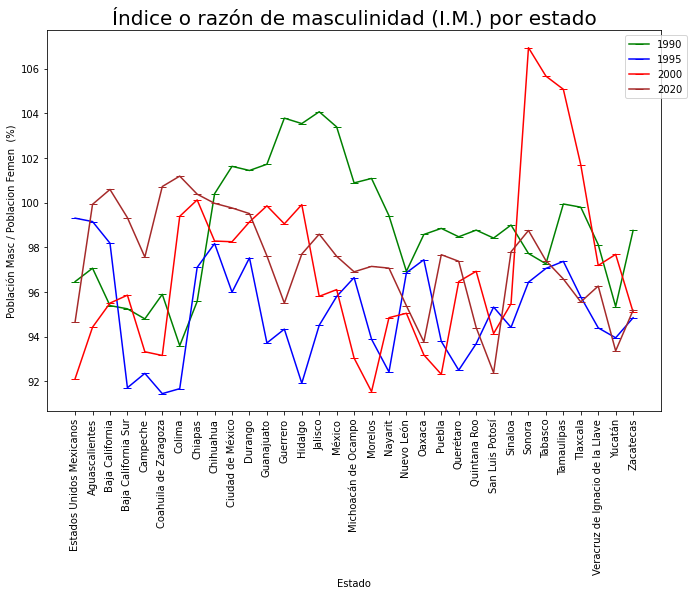

In [ ]:
if 'I.M.' in informacion_a_graficar5:
  x = input('\n¿Quieres una grafica (por fecha) de el Índice o razón de masculinidad (I.M.)?    (SI/NO, "Enter" = NO)\n\n(NO ES RECOMENDABLE QUE SE GRAFIQUE SI PEDISTE MENOS DE 5 ESTADOS)\n\n').lower()
  if x == 'si':
    print('')
    mostrargrafico(listafechas, listaentidades, indic_masc,  'Índice o razón de masculinidad (I.M.)', 'Población Masc / Poblacion Femen  (%)')

In [ ]:
informacion_a_graficar5['T.M.'] #Esta opcion solo está disponible cuando pediste la funcion en el codigo original

In [ ]:
informacion_a_graficar5['I.M.']  #Esta opcion solo está disponible cuando pediste la funcion en el codigo original

In [ ]:
informacion_a_graficar5['I.M.E.']   #Esta opcion solo está disponible cuando pediste la funcion en el codigo original

In [ ]:
informacion_a_graficar5['B.D.']   #Esta opcion solo está disponible cuando pediste la funcion en el codigo original